In [1]:
from ultralytics import YOLO             # importing the YOLO class from the ultralytics library
import os                                # importing os module for interacting with the operating system
from matplotlib import pyplot as plt     # importing pyplot from matplotlib for plotting images
import cv2                               # importing OpenCV library for image processing

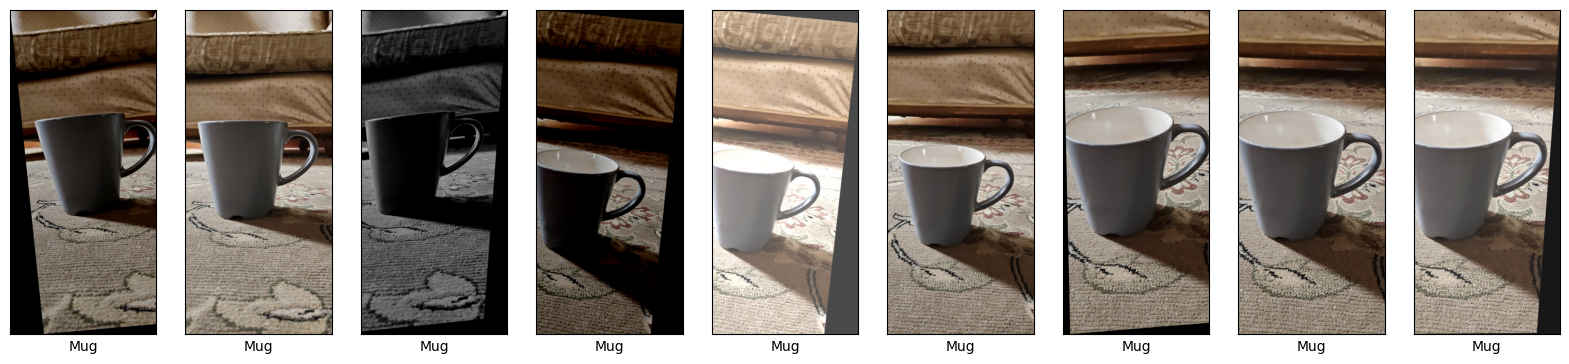

In [ ]:
# setting the figure size for plotting images
plt.figure(figsize=(20,5))

# iterating through the first 9 images in the dataset
for s in range(9):

    # creating a subplot for each image and removing x and y ticks
    plt.subplot(1,9,s+1); plt.xticks([]); plt.yticks([])
  
    # reading the label and image files for the current index s
    l   = open      (os.path.join('Object-Detection', 'train/labels', sorted(os.listdir(os.path.join('Object-Detection', 'train/labels')))[s]),'r').read()[0]
    img = plt.imread(os.path.join('Object-Detection', 'train/images', sorted(os.listdir(os.path.join('Object-Detection', 'train/images')))[s]))
    
    # setting the x-axis label based on the value of l
    if l == "0":
      plt.xlabel("Mug")
    elif l == "1":
      plt.xlabel("Person")
    elif l == '2':
      plt.xlabel("Shoes")
    
    # displaying the image in the subplot
    plt.imshow(img)

In [ ]:
# creating an instance and downloading YOLO model using the pre-trained weights from "yolov8n.pt"
model = YOLO("yolov8n.pt")

# training the model using the specified dataset, number of epochs, image size, batch size, and patience for early stopping
model.train(data='Object-Detection/data.yaml', epochs=100, imgsz=416, batch=16, patience=30)

In [ ]:
# creating an instance of the YOLO model using the custom-trained weights from "best.pt"
modelv1 = YOLO("best.pt")

In [ ]:
# performing object detection on the specified image using the custom-trained model and saving the results
modelv1('Object-Detection/test/images/IMG20260213132230_jpg.rf.128193945cc8c5f0aeaa07cb17aed3f4.jpg',save=True, save_txt=True, save_conf=True)

In [ ]:
# Open the video file
cap = cv2.VideoCapture(source=0)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLO inference on the frame
        results = modelv1(frame)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        x = cv2.resize(annotated_frame, (800, 500))
        cv2.imshow("YOLOv8 Detection", x)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()